# Teknik Binning


Data binning adalah metode prapemrosesan data yang digunakan untuk mengelompokkan nilai-nilai numerik ke dalam beberapa interval atau kelompok yang disebut bin. Dalam setiap bin, nilai-nilai data digantikan oleh suatu nilai representatif, seperti rata-rata, median, atau nilai batas bin tersebut. Tujuan dari teknik ini adalah untuk mengurangi gangguan akibat noise atau kesalahan pengamatan, serta untuk menghaluskan (smoothing) distribusi data agar lebih mudah dianalisis. Selain itu, data binning juga dapat membantu mengurangi kompleksitas model dan menurunkan risiko overfitting, terutama ketika jumlah data terbatas. Metode ini umum digunakan dalam analisis data eksploratif dan dalam tahap persiapan sebelum penerapan algoritma pembelajaran mesin.

## Library yang digunakan

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Ambil data iris asli

Di sini saya mengambil data Iris dari library sklearn, kemudian mengubahnya menjadi DataFrame dan menampilkan semua fiturnya agar mudah dilihat dan dianalisis.

In [2]:
# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
               5.1               3.5                1.4               0.2
               4.9               3.0                1.4               0.2
               4.7               3.2                1.3               0.2
               4.6               3.1                1.5               0.2
               5.0               3.6                1.4               0.2
               5.4               3.9                1.7               0.4
               4.6               3.4                1.4               0.3
               5.0               3.4                1.5               0.2
               4.4               2.9                1.4               0.2
               4.9               3.1                1.5               0.1
               5.4               3.7                1.5               0.2
               4.8               3.4                1.6               0.2
               4.8               3.0  

### Klasifikasi Naive Bayes pada Data Iris asli

Di sini saya menggunakan algoritma Naive Bayes untuk mengklasifikasi data Iris. Data dibagi untuk pelatihan dan pengujian, lalu model dilatih, diuji, dan dievaluasi menggunakan akurasi, laporan klasifikasi, serta visualisasi confusion matrix.

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



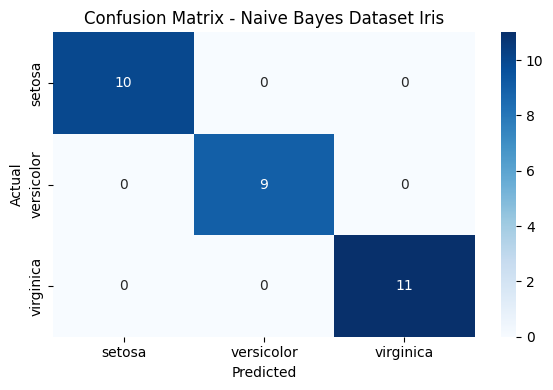

In [3]:

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Dataset Iris')
plt.tight_layout()
plt.show()


### Klasifikasi Decision Tree pada Data Iris asli

Di sini saya menggunakan algoritma Decision Tree untuk mengklasifikasi data Iris, menghitung akurasi, dan menampilkan visualisasi pohon keputusan untuk melihat proses klasifikasinya.

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



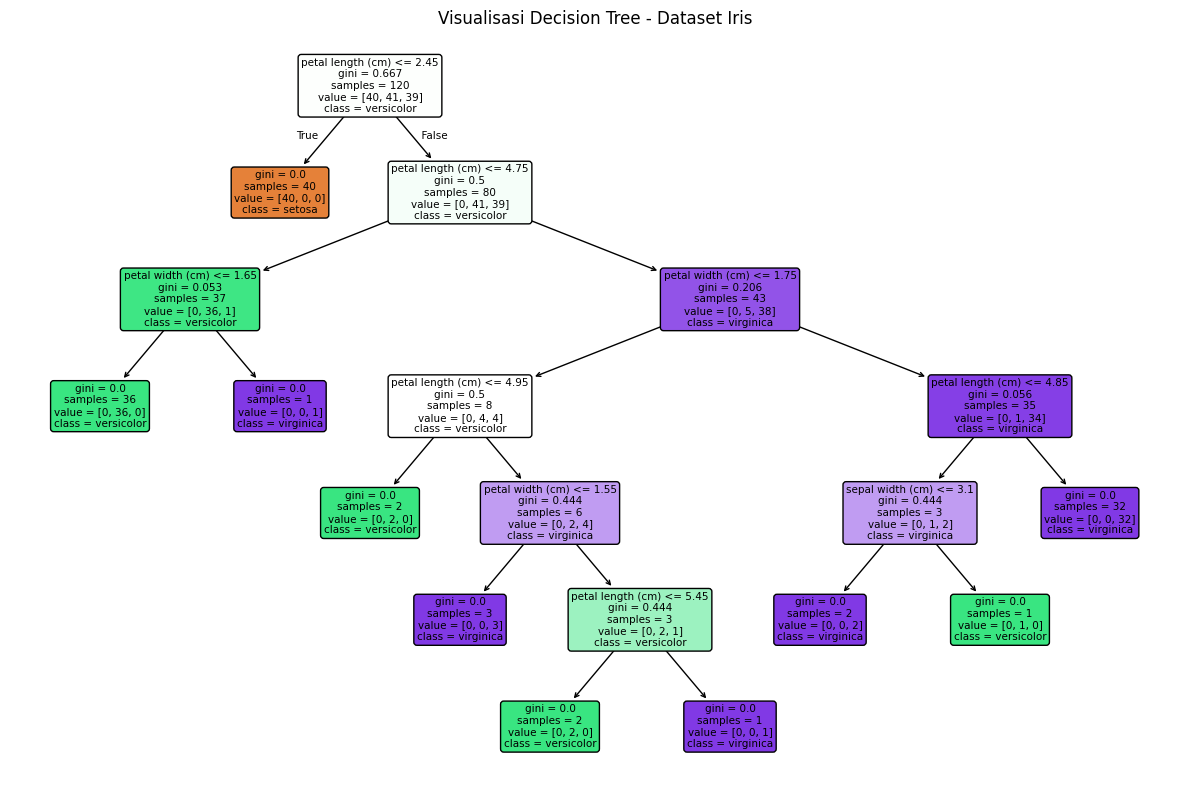

In [4]:
# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=target_names))

# Visualisasi Pohon Keputusan
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree - Dataset Iris")
plt.tight_layout()
plt.show()

## Diskritisasi Dataset Iris

### Diskritisasi Dataset Iris menggunakan K-Means

#### Penjelasan Konsep Diskritisasi menggunakan K-means
Dalam pengolahan data, **K-Means Discretization** adalah salah satu metode diskritisasi yang cukup pintar dan fleksibel. Metode ini menggunakan pendekatan *unsupervised learning*, artinya algoritma bekerja tanpa label dan langsung mencari pola dari data numerik. Tujuannya adalah membagi data menjadi beberapa kelompok (cluster) berdasarkan kesamaan nilai. Misalnya, jika kita ingin membuat 3 kelompok, maka algoritma akan memilih 3 titik pusat (centroid) secara acak. Setiap data akan dihitung jaraknya ke titik-titik tersebut, lalu dimasukkan ke kelompok dengan jarak terdekat. Setelah semua data dikelompokkan, posisi centroid diperbarui berdasarkan rata-rata nilai dalam kelompok, dan proses ini diulang sampai hasilnya tidak berubah lagi.

Metode ini sangat berguna ketika data tidak tersebar secara merata atau membentuk pola tertentu. Berbeda dengan cara diskritisasi biasa yang membagi data ke dalam interval yang tetap, K-Means membentuk kelompok berdasarkan bagaimana data sebenarnya tersebar. Hasilnya pun lebih akurat dan bermakna. Namun, metode ini memerlukan proses yang berulang dan sensitif terhadap pemilihan titik awal, serta kita harus menentukan jumlah kelompok dari awal. Meski begitu, K-Means Discretization tetap menjadi pilihan yang baik jika kita ingin membagi data dengan cara yang sesuai dengan pola alaminya.


In [5]:
# Mapping angka cluster ke huruf
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Fungsi clustering per kolom
def cluster_column(column):
    values = df[[column]]
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(values)
    return pd.Series(clusters).map(label_map)

# Buat DataFrame hanya berisi hasil clustering
df_kmeans = pd.DataFrame({
    'sepal_length': cluster_column('sepal length (cm)'),
    'sepal_width':  cluster_column('sepal width (cm)'),
    'petal_length': cluster_column('petal length (cm)'),
    'petal_width':  cluster_column('petal width (cm)')
})

# Tambahkan kolom class_label di bagian depan
df_kmeans.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil klaster
print(df_kmeans.to_string(index=False))

     class sepal_length sepal_width petal_length petal_width
    setosa            C           D            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           D            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           A            B           B
    setosa            B           D            B           B
    setosa            C           A            B           B
    setosa            C           C            B           B
    setosa            C           C            B           B
    setosa            B           D            B           B
    setosa            B 

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan K-Means

Di sini saya mengklasifikasi data Iris hasil diskritisasi K-Means menggunakan Naive Bayes untuk data kategori, lalu menghitung akurasi dan menampilkan laporan klasifikasi untuk melihat hasilnya.

In [6]:
# Proses Klasifikasi Naive Bayes (CategoricalNB)

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.67      0.80         9
   virginica       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan K-Means

Di sini saya melakukan klasifikasi Decision Tree pada data Iris yang telah didiskritisasi dengan metode K-Means, kemudian menghitung akurasinya untuk mengevaluasi hasil klasifikasi.










Akurasi: 0.9

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



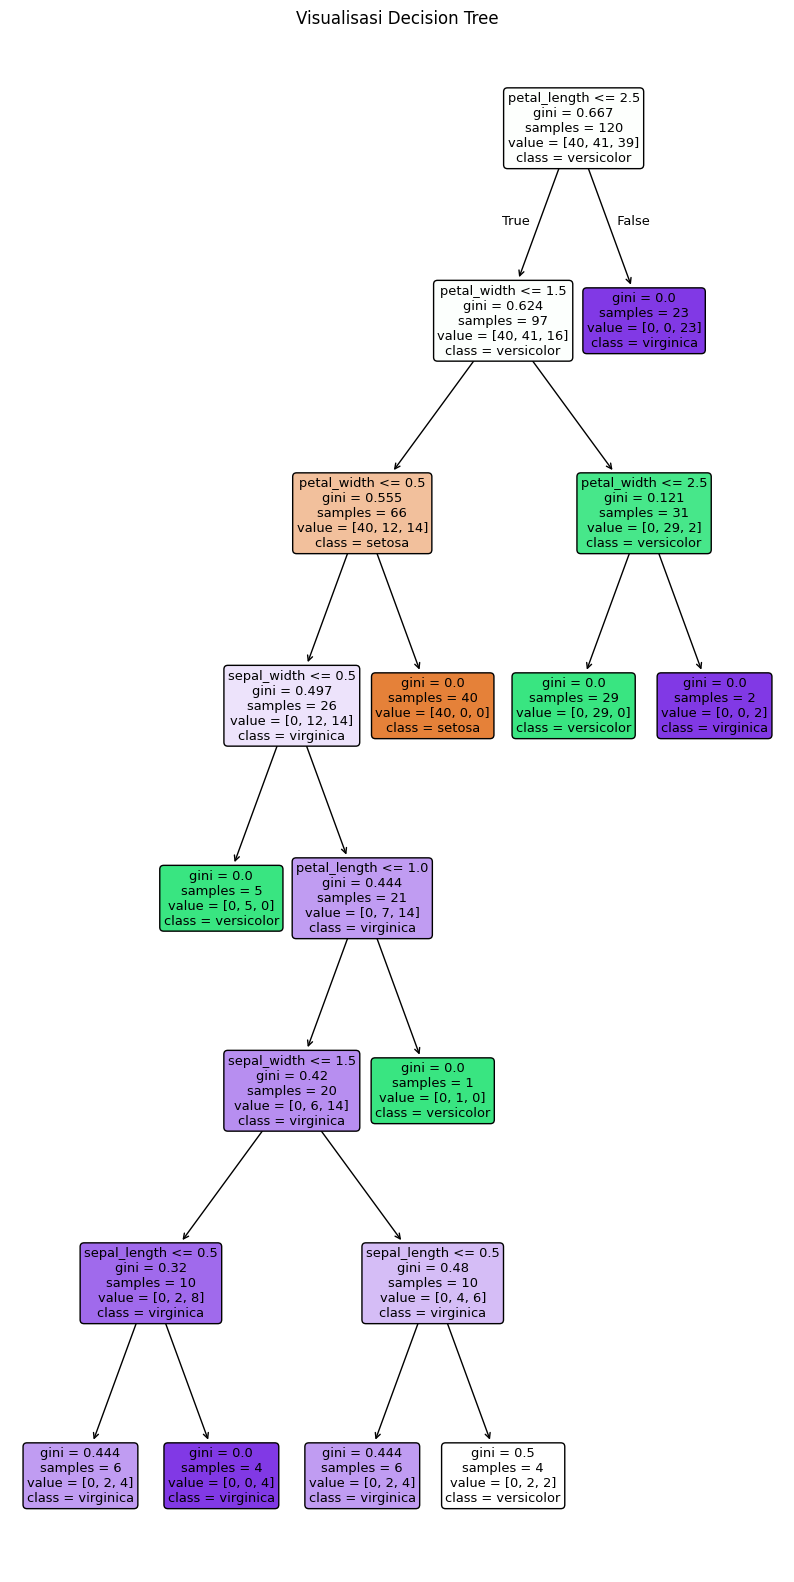

In [7]:
# Proses Klasifikasi Decision Tree

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_kmeans.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_kmeans['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Tree
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


In [8]:
# Simpan ke file CSV
df_kmeans.to_csv('diskritisasi_iris_kmeans.csv', index=False)

### Diskritisasi Dataset Iris menggunakan Equal-Width Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal Width Binning
Diskritisasi dengan Equal-Width Binning adalah metode sederhana untuk mengelompokkan data numerik. Berbeda dengan K-Means yang membentuk kelompok berdasarkan pola data, metode ini membagi rentang nilai data menjadi beberapa bagian (bin) yang lebarnya sama. Caranya, kita cari nilai terkecil dan terbesar dari data, lalu hitung selisihnya. Selisih ini kemudian dibagi dengan jumlah bin yang diinginkan. Misalnya, jika data memiliki nilai antara 12 dan 40, dan ingin dibagi menjadi 3 bin, maka lebar tiap bin adalah (40 - 12) / 3 = 9.33. Hasilnya, bin pertama berisi nilai dari 12 hingga 21.33, bin kedua dari 21.33 hingga 30.66, dan bin ketiga dari 30.66 hingga 40.

Setelah membagi rentang, setiap nilai data dimasukkan ke dalam bin yang sesuai. Untuk memudahkan analisis, setiap bin bisa diberi label seperti "Rendah", "Sedang", dan "Tinggi". Metode ini sangat mudah diterapkan dan cocok digunakan saat awal eksplorasi data. Namun, kelemahannya adalah tidak mempertimbangkan bagaimana data tersebar. Jika data banyak terkumpul di satu sisi, bisa jadi satu bin terlalu penuh sementara bin lain kosong. Maka dari itu, Equal-Width Binning paling cocok digunakan saat data memiliki penyebaran yang cukup merata atau ketika kita ingin cara yang simpel dan cepat.



In [9]:
# Fungsi diskritisasi equal-width
def equiwidth_discretize(arr, m):
    min_val = arr.min()
    max_val = arr.max()
    width = (max_val - min_val) / m

    # Buat batas-batas bin
    bin_edges = [min_val + i * width for i in range(m + 1)]

    # Diskritisasi: untuk setiap nilai, cari bin index
    bin_indices = np.digitize(arr, bins=bin_edges[1:-1], right=True)
    return pd.Series(bin_indices).map(label_map)

# Buat DataFrame hasil diskritisasi
df_equal_width = pd.DataFrame({
    'sepal_length': equiwidth_discretize(df['sepal length (cm)'], 4),
    'sepal_width':  equiwidth_discretize(df['sepal width (cm)'], 4),
    'petal_length': equiwidth_discretize(df['petal length (cm)'], 4),
    'petal_width':  equiwidth_discretize(df['petal width (cm)'], 4)
})

# Tambahkan label kelas di depan
df_equal_width.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_width.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           C            A           A
    setosa            A           C            A           A
    setosa            A           B            A           A
    setosa            A           B            A           A
    setosa            B           D            A           A
    setosa            B 

In [10]:
# Simpan ke file CSV
df_equal_width.to_csv('diskritisasi_iris_equalwidth.csv', index=False)

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Width

Di sini saya melakukan klasifikasi Naive Bayes pada data Iris yang telah didiskritisasi menggunakan metode Equal-Width Binning, kemudian menghitung akurasi untuk mengevaluasi hasil klasifikasinya.

In [11]:
# Proses Klasifikasi Naive Bayes (CategoricalNB)

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.9333333333333333

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Width Binning

Di sini saya menerapkan algoritma Decision Tree pada data Iris yang telah melalui proses diskritisasi dengan Equal-Width Binning, lalu mengukur akurasi model untuk menilai performa klasifikasinya.

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



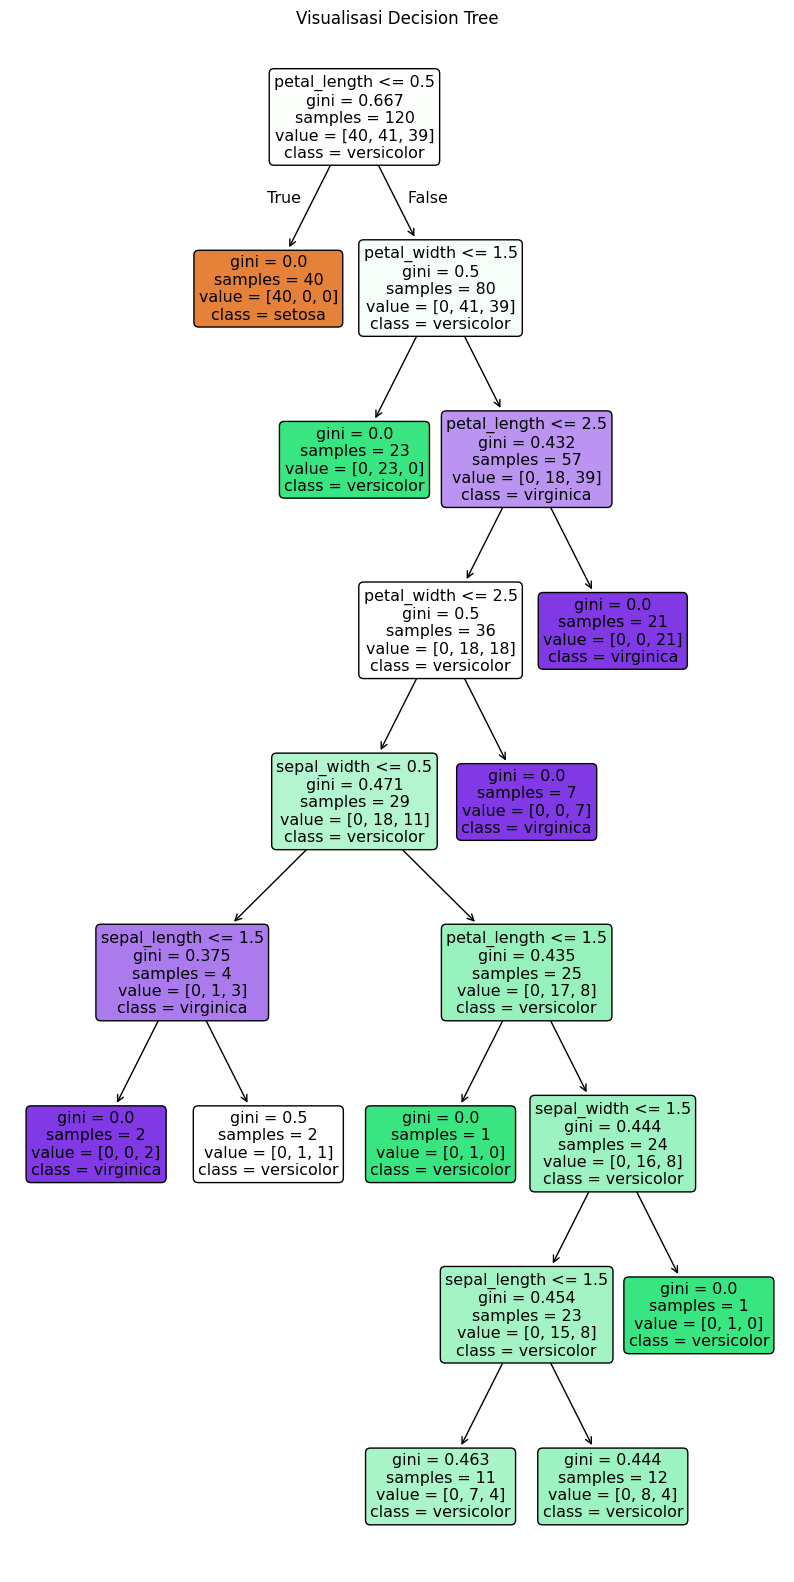

In [12]:
# Proses Klasifikasi Decision Tree

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_width.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_width['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Tree
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Diskritisasi Dataset Iris menggunakan Equal-Frequency Binning

#### Penjelasan Konsep Diskritisasi menggunakan Equal-Frequency Binning

**Equal-Frequency Binning** adalah metode diskritisasi data numerik yang membagi data ke dalam beberapa kelompok (bin) dengan jumlah data yang hampir sama di setiap bin. Berbeda dengan Equal-Width Binning yang membagi berdasarkan rentang nilai yang tetap, Equal-Frequency berfokus pada pembagian jumlah data. Caranya adalah dengan mengurutkan seluruh data dari yang terkecil hingga terbesar, lalu membaginya menjadi beberapa bin sesuai jumlah yang ditentukan. Misalnya, jika dibagi menjadi 4 bin, maka masing-masing akan berisi sekitar 25% dari total data. Batas antar bin ditentukan berdasarkan nilai kuantil seperti Q1 (25%), Q2 (median), dan Q3 (75%).

Keunggulan utama metode ini adalah menjaga keseimbangan jumlah data antar bin, sehingga sangat berguna dalam pelatihan model machine learning agar tidak ada kategori yang terlalu dominan atau terlalu sedikit datanya. Namun, karena fokusnya pada jumlah data, lebar rentang nilai dalam tiap bin bisa berbeda-beda—ada yang sempit dan ada yang sangat lebar. Hal ini bisa membuat interpretasi data menjadi sedikit lebih rumit. Meskipun begitu, Equal-Frequency tetap menjadi pilihan yang baik ketika kestabilan jumlah sampel dalam tiap kelompok lebih penting dibanding keseragaman rentang nilainya.


In [13]:
# Fungsi manual untuk equal-frequency discretization
def discretize_cdf(data, m):
    data = list(data)
    data_sorted = sorted(data)
    n = len(data_sorted)
    thresholds = [-float('inf')]

    # Hitung batas kuantil
    for k in range(1, m):
        q = k / m
        index = (n - 1) * q
        floor = int(index)
        ceil = floor + 1
        frac = index - floor
        if ceil >= n:
            val = data_sorted[floor]
        else:
            val = data_sorted[floor] + (data_sorted[ceil] - data_sorted[floor]) * frac
        thresholds.append(val)

    thresholds.append(float('inf'))

    # Tentukan label bin untuk setiap nilai
    labels = []
    for value in data:
        for b in range(1, len(thresholds)):
            if thresholds[b - 1] <= value < thresholds[b]:
                labels.append(label_map[b - 1])
                break

    return labels

# Terapkan discretization ke setiap kolom
df_equal_frequency = pd.DataFrame({
    'sepal_length': discretize_cdf(df['sepal length (cm)'], 4),
    'sepal_width':  discretize_cdf(df['sepal width (cm)'], 4),
    'petal_length': discretize_cdf(df['petal length (cm)'], 4),
    'petal_width':  discretize_cdf(df['petal width (cm)'], 4)
})

# Tambahkan kolom kelas di depan
df_equal_frequency.insert(0, 'class', pd.Series(iris.target).map(lambda i: iris.target_names[i]))

# Tampilkan hasil
print(df_equal_frequency.to_string(index=False))


     class sepal_length sepal_width petal_length petal_width
    setosa            B           D            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            A           D            A           A
    setosa            B           D            B           B
    setosa            A           D            A           B
    setosa            A           D            A           A
    setosa            A           B            A           A
    setosa            A           C            A           A
    setosa            B           D            A           A
    setosa            A           D            B           A
    setosa            A           C            A           A
    setosa            A           C            A           A
    setosa            C           D            A           A
    setosa            B 

In [14]:
# Simpan ke file CSV
df_equal_frequency.to_csv('diskritisasi_iris_equalfrequency.csv', index=False)

#### Klasifikasi Naive Bayes pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Di sini saya menerapkan klasifikasi Naive Bayes pada data Iris yang telah didiskritisasi menggunakan metode Equal-Frequency Binning, dengan tujuan untuk mengetahui seberapa akurat model dalam mengklasifikasikan data tersebut.










In [15]:
# Proses Klasifikasi Naive Bayes (CategoricalNB)

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Categorical Naive Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Cetak hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Klasifikasi Decision Tree pada Data Iris hasil Diskritisasi menggunakan Equal-Frequency

Disini saya melakukan klasifikasi Decision Tree pada data iris hasil diskritisasi menggunakan Equal-Frequency Binning, untuk mencari akurasi data iris

Akurasi: 0.9666666666666667

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



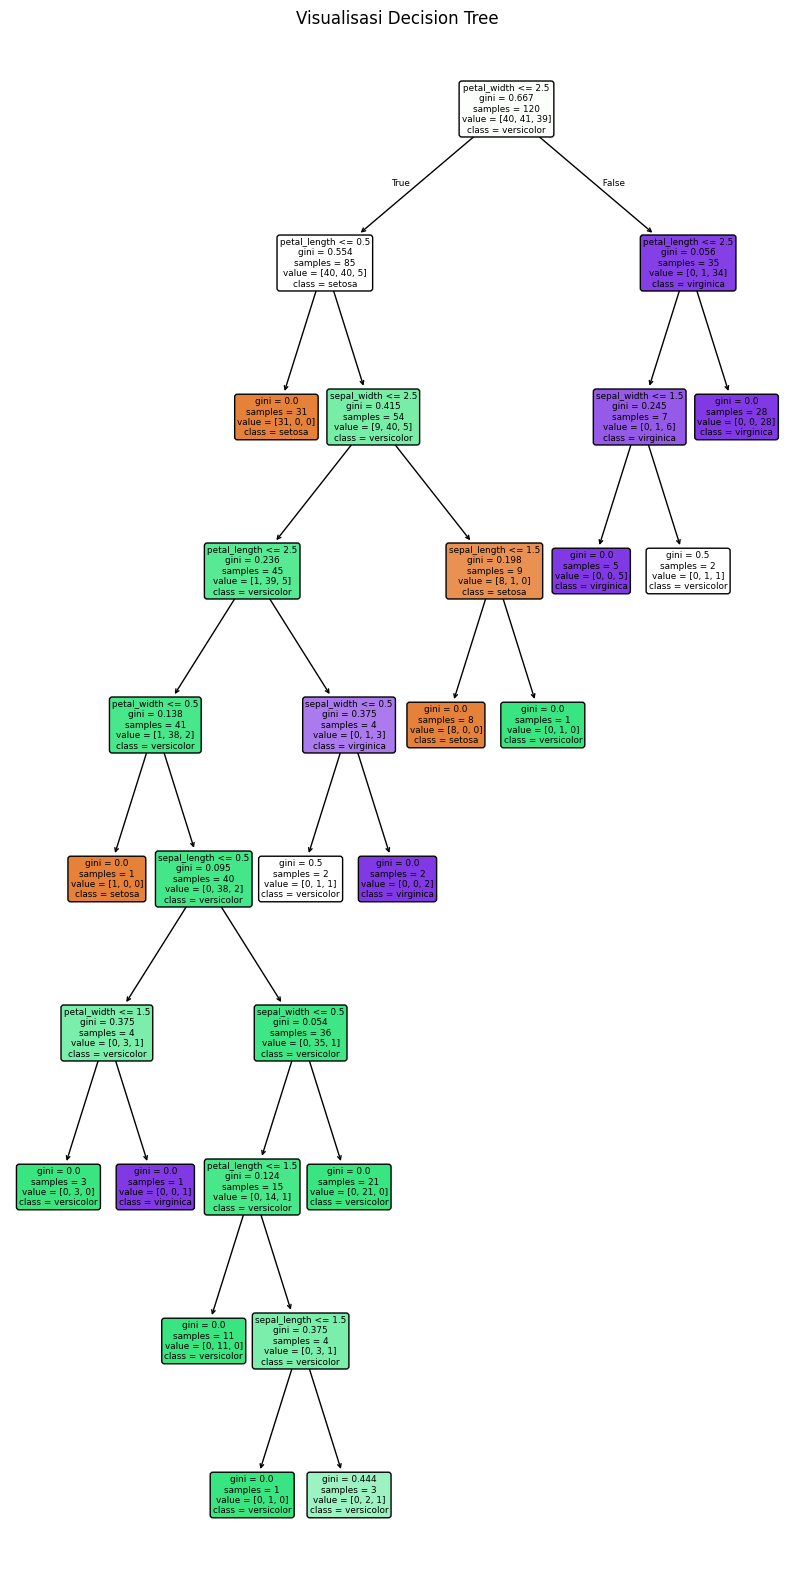

In [16]:
# Proses Klasifikasi Decision Tree

# Encode nilai kategori A-D ke angka
le = LabelEncoder()
X = df_equal_frequency.drop(columns='class').apply(le.fit_transform)

# Encode label kelas asli (class)
y = df_equal_frequency['class']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi Decision Tree
plt.figure(figsize=(10, 20))
plot_tree(model,
          feature_names=X.columns,
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()


### Perbandingan Akurasi

Data iris asli
- Naive Bayes = 100 %
- Decision Tree = 100 %

Data iris hasil diskritisasi menggunakan Kmeans
- Naive Bayes = 90 %
- Decision Tree = 90 %

Data iris hasil diskritisasi menggunakan Equal-Width Binning
- Naive Bayes = 93,33 %
- Decision Tree = 96,67 %

Data iris hasil diskritisasi menggunakan Equal-Frequency Binning
- Naive Bayes = 100 %
- Decision Tree = 96,67 %